In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
%matplotlib inline

In [3]:
df = pd.read_csv('Mall_Customers.csv') 

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
#change Column name
df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [6]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.shape

(200, 5)

In [8]:
df.isnull().sum()

CustomerID    0
gender        0
age           0
income        0
score         0
dtype: int64

In [9]:
df.isnull().values.any()

False

In [10]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


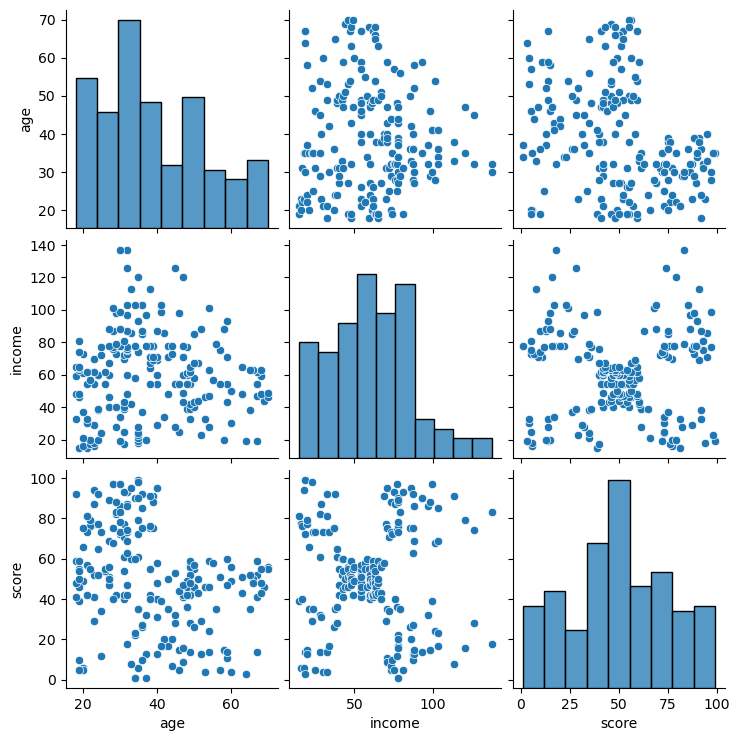

In [11]:
seaborn.pairplot(df[['age', 'income', 'score']])

# K-Means Clustering

In [12]:
import sklearn.cluster as cluster

#### income, score

In [13]:
kmeans = cluster.KMeans(n_clusters=5)

In [14]:
kmeans = kmeans.fit(df[['income', 'score']])

C:\Users\Abu Naiim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abu Naiim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
kmeans.cluster_centers_ #x,y

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [16]:
df['income_clusters'] = kmeans.labels_

In [17]:
df['income_clusters'].value_counts()

1    81
3    39
0    35
4    23
2    22
Name: income_clusters, dtype: int64

<Axes: xlabel='income', ylabel='score'>

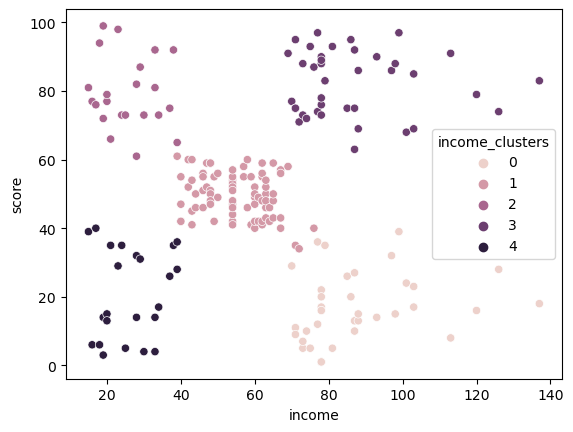

In [18]:
seaborn.scatterplot(x='income', y='score', hue='income_clusters', data=df)

#### age, score

In [19]:
kmeans = cluster.KMeans(n_clusters=2)

In [20]:
kmeans = kmeans.fit(df[['age', 'score']])

C:\Users\Abu Naiim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abu Naiim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [22]:
df['age_clusters'] = kmeans.labels_

In [23]:
df['age_clusters'].value_counts()

1    115
0     85
Name: age_clusters, dtype: int64

In [24]:
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,4,1
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,4,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,0
196,197,Female,45,126,28,0,1
197,198,Male,32,126,74,3,0
198,199,Male,32,137,18,0,1


<Axes: xlabel='age', ylabel='score'>

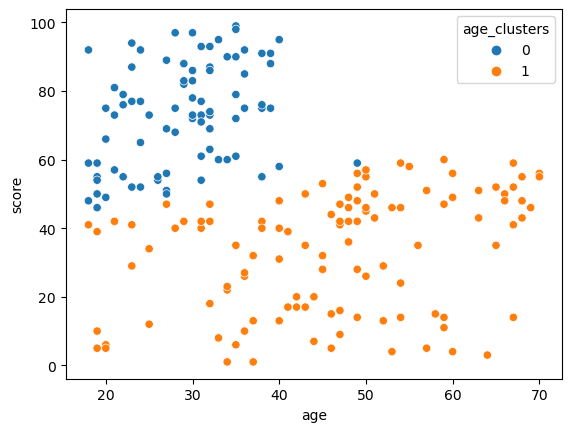

In [25]:
seaborn.scatterplot(x='age', y='score', hue='age_clusters', data=df)

# WCSS

#### income, score

In [26]:
from sklearn.cluster import KMeans

In [28]:
k_range = range(1,12)
wcss = []

In [31]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)

C:\Users\Abu Naiim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abu Naiim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abu Naiim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abu Naiim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

In [32]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30227.606513152015,
 25028.02047526941,
 21818.11458845218,
 19672.07284901432,
 17872.8381541585]

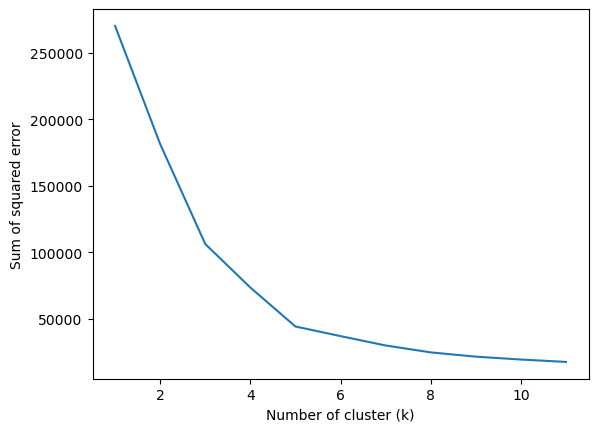

In [34]:
plt.xlabel('Number of cluster (k)')
plt.ylabel('Sum of squared error')
plt.plot(k_range, wcss)

#### age, score